In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [5]:
import requests

# Import the API key.
from config import weather_api_key

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d47aac7ea992677558cb21db7fce8e01


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | cherskiy
Processing Record 2 of Set 13 | bereda
Processing Record 3 of Set 13 | upernavik
Processing Record 4 of Set 13 | busselton
Processing Record 5 of Set 13 | mandeville
Processing Record 6 of Set 13 | kirakira
Processing Record 7 of Set 13 | hermanus
Processing Record 8 of Set 13 | banepa
Processing Record 9 of Set 13 | hamilton
Processing Record 10 of Set 13 | natal
Processing Record 11 of Set 13 | moron
Processing Record 12 of Set 13 | nioro
Processing Record 13 of Set 13 | marcona
City not found. Skipping...
Processing Record 14 of Set 13 | yellowknife
Processing Record 15 of Set 13 | port-de-paix
City not found. Skipping...
Processing Record 16 of Set 13 | hay river
Processing Record 17 of Set 13 | vaini
Processing Record 18 of Set 13 | severo-kurilsk
Processing Record 19 of Set 13 | alihe
Processing Record 20 of Set 13 | salair
Processing Record 21 of Set 13 | punta arenas
Processing Record 22 of Set 13 | tuktoyaktuk
Processing Record 23 of Se

Processing Record 37 of Set 16 | margate
Processing Record 38 of Set 16 | iquitos
Processing Record 39 of Set 16 | castro
Processing Record 40 of Set 16 | batsfjord
Processing Record 41 of Set 16 | deer lake
Processing Record 42 of Set 16 | asosa
Processing Record 43 of Set 16 | marsabit
Processing Record 44 of Set 16 | tiznit
Processing Record 45 of Set 16 | pandan
Processing Record 46 of Set 16 | shache
Processing Record 47 of Set 16 | lyubim
Processing Record 48 of Set 16 | three hills
Processing Record 49 of Set 16 | puerto escondido
Processing Record 50 of Set 16 | uarini
Processing Record 1 of Set 17 | caravelas
Processing Record 2 of Set 17 | farafangana
Processing Record 3 of Set 17 | quepos
Processing Record 4 of Set 17 | merauke
Processing Record 5 of Set 17 | east london
Processing Record 6 of Set 17 | lata
Processing Record 7 of Set 17 | cidreira
Processing Record 8 of Set 17 | ayan
Processing Record 9 of Set 17 | grindavik
Processing Record 10 of Set 17 | mataram
Processin

Processing Record 25 of Set 20 | muli
Processing Record 26 of Set 20 | muros
Processing Record 27 of Set 20 | hihifo
City not found. Skipping...
Processing Record 28 of Set 20 | salina
Processing Record 29 of Set 20 | kuytun
Processing Record 30 of Set 20 | flin flon
Processing Record 31 of Set 20 | elban
Processing Record 32 of Set 20 | palestina
Processing Record 33 of Set 20 | christchurch
Processing Record 34 of Set 20 | antalaha
Processing Record 35 of Set 20 | tasiilaq
Processing Record 36 of Set 20 | ambah
Processing Record 37 of Set 20 | mikhaylovka
Processing Record 38 of Set 20 | shanting
Processing Record 39 of Set 20 | lasa
Processing Record 40 of Set 20 | chekhov
Processing Record 41 of Set 20 | naliya
Processing Record 42 of Set 20 | korla
Processing Record 43 of Set 20 | porto walter
Processing Record 44 of Set 20 | bin qirdan
Processing Record 45 of Set 20 | coihaique
Processing Record 46 of Set 20 | cayce
Processing Record 47 of Set 20 | vega de alatorre
Processing Rec

Processing Record 11 of Set 24 | lahaina
Processing Record 12 of Set 24 | warmbad
Processing Record 13 of Set 24 | safranbolu
Processing Record 14 of Set 24 | tongzi
Processing Record 15 of Set 24 | utica
Processing Record 16 of Set 24 | shalinskoye
Processing Record 17 of Set 24 | leshukonskoye
Processing Record 18 of Set 24 | itarema
Processing Record 19 of Set 24 | gorontalo
Processing Record 20 of Set 24 | vanavara
Processing Record 21 of Set 24 | beloha
Processing Record 22 of Set 24 | baherden
Processing Record 23 of Set 24 | sumbe
Processing Record 24 of Set 24 | vilcun
Processing Record 25 of Set 24 | porto velho
Processing Record 26 of Set 24 | kavaratti
Processing Record 27 of Set 24 | meyungs
City not found. Skipping...
Processing Record 28 of Set 24 | aranos
Processing Record 29 of Set 24 | machala
Processing Record 30 of Set 24 | ust-ilimsk
Processing Record 31 of Set 24 | basco
Processing Record 32 of Set 24 | anadyr
Processing Record 33 of Set 24 | opuwo
Processing Recor

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2020-09-30 00:59:59,68.75,161.30,45.46,58,100,16.62
1,Bereda,ES,2020-09-30 01:00:54,43.27,-7.54,53.01,100,1,1.01
2,Upernavik,GL,2020-09-30 01:09:34,72.79,-56.15,23.61,87,74,7.63
3,Busselton,AU,2020-09-30 01:09:34,-33.65,115.33,64.00,80,93,11.14
4,Mandeville,JM,2020-09-30 01:09:34,18.04,-77.51,78.80,83,75,2.24
5,Kirakira,SB,2020-09-30 01:09:35,-10.45,161.92,83.19,77,24,12.03
6,Hermanus,ZA,2020-09-30 01:09:35,-34.42,19.23,45.00,93,29,3.67
7,Banepa,NP,2020-09-30 01:09:35,27.63,85.52,69.80,94,75,2.24
8,Hamilton,US,2020-09-30 01:09:35,39.18,-84.53,54.00,87,75,4.70
9,Natal,BR,2020-09-30 01:09:35,-5.79,-35.21,73.40,88,20,5.82


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/29/20'

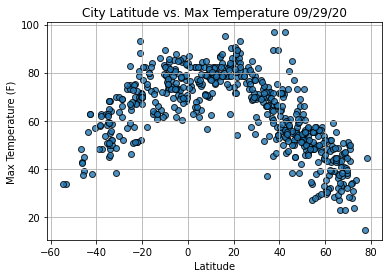

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

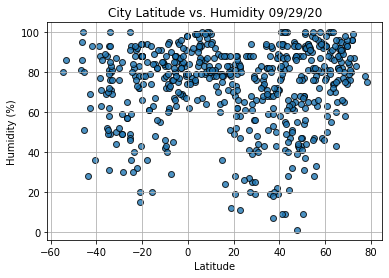

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

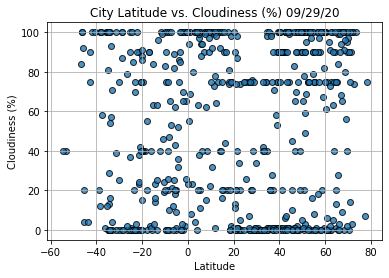

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

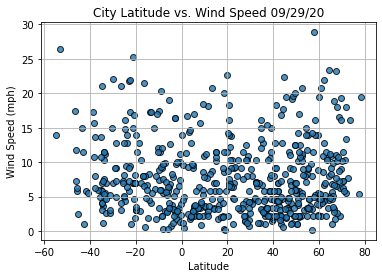

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Hay River
Country                        CA
Date          2020-09-30 01:09:36
Lat                         60.82
Lng                        -115.8
Max Temp                     48.2
Humidity                       81
Cloudiness                     75
Wind Speed                   20.8
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
568     True
569    False
570    False
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2020-09-30 00:59:59,68.75,161.30,45.46,58,100,16.62
1,Bereda,ES,2020-09-30 01:00:54,43.27,-7.54,53.01,100,1,1.01
2,Upernavik,GL,2020-09-30 01:09:34,72.79,-56.15,23.61,87,74,7.63
4,Mandeville,JM,2020-09-30 01:09:34,18.04,-77.51,78.80,83,75,2.24
7,Banepa,NP,2020-09-30 01:09:35,27.63,85.52,69.80,94,75,2.24
...,...,...,...,...,...,...,...,...,...
565,Chinchina,CO,2020-09-30 01:07:09,4.98,-75.60,61.57,85,38,2.93
566,Sisimiut,GL,2020-09-30 01:11:24,66.94,-53.67,30.94,91,68,1.79
568,Kishtwar,IN,2020-09-30 01:11:25,33.32,75.77,51.71,43,0,4.36
571,Erenhot,CN,2020-09-30 01:11:25,43.65,111.98,51.53,40,100,16.82


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

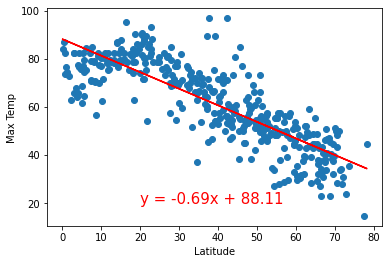

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(20,20))

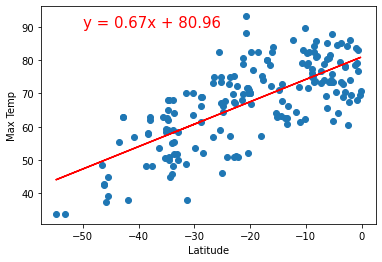

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

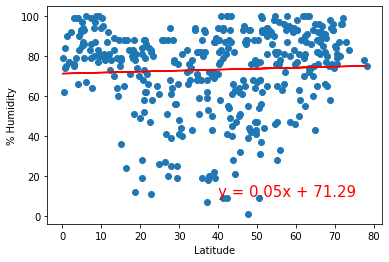

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

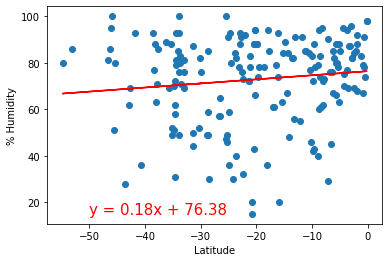

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

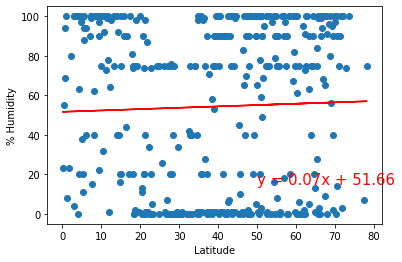

In [29]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', '% Humidity',(50,15))

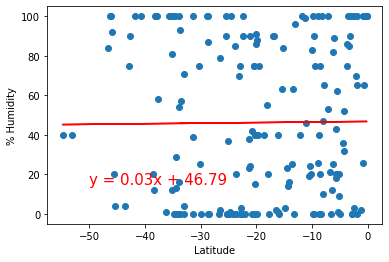

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness', '% Humidity',(-50,15))

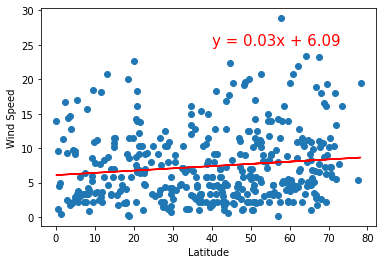

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))


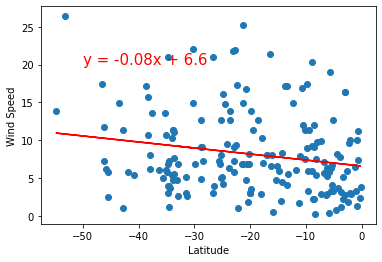

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", 'Wind Speed',(-50,20))